In [4]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

In [ ]:


#resetting based paramater to random module
np.random.seed(0)

X = [[1,2,3,2.5],
     [2.0,5.0,-1.0,2.0],
     [1.5,2.7,3.3,-0.8]
]

w_s = [[1,5],
       [3,5],
       [1,5],
]

In [15]:


class Layer_Danse:
    def __init__(self,n_inputs,n_nulons):
        # weights shape should be (numbers of nurons,numbers of inputs)
        # [[2,4,5],
        #  [1,3,6],  this is (2,3), the left side number expresses the more major components, 2 means 2lists,
        # ]          righter nuber 3 means denotes the minor components, like the elements of lists
        #            for no need of Transpose, in advanse made weights reversed like (numbers of inputs,numbers of nurons)
        self.weights = 0.1*np.random.randn(n_inputs,n_nulons)
        self.biases = np.zeros((1,n_nulons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    
class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
()
[]
class Activation_Softmax:
    def forward(self,inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities
        
'''
Class Loss, meaning a base for every loss function which will vary on what loss f used
calculate method will be used for every loss functions
so define in this base class
On calculate method, What's defined is just instration comes after each loss's functions processing
'''
class Loss:
    def calculate(self,output,y):
        #call forward function which is defined in each children's functions
        each_losses = self.forward(output, y)
        average_losses = np.mean(each_losses)
        return average_losses


    
'''
CategoricalCrossEntropy
Calculate Losses of output layers
There are distribution on output layers 
Losses should be increase, when predicted value is low on target nulon
Losses should be decrease, when predicted value is higg on target nulon

but x(just predicted value as it is) can be negative, too big number 
↑
hundled already by activation_relu, activation_softmax respectively

logarithm allows us to inverse proporional to the inputs(outputs of activation_softmax)
'''

class LossCategoricalCrossEntropy(Loss):
    #y_tar for what? target means its numbers refer to the indices 
    def forward(self,y_pred,y_tar):
        #for however many values the scalar will be
        samples_n = len(y_pred)
        #clip precicted distribution for not to allow 0 of distribution
        y_clipped = np.clip(y_pred, 1e-07, 1 - 1e-07)
        #for cases either target format is scalar or vector
        
        #for scalar
        if len(y_tar.shape) == 1:
            correct_confidences = y_clipped[range(samples_n),y_tar]
            
        elif len(y_tar.shape) == 2:
            correct_confidences = np.sum(y_clipped*y_tar, axis=1)
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
            
    


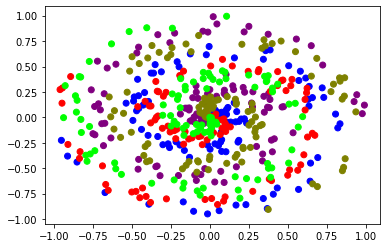

{0, 1, 2, 3, 4}


In [26]:
'''
what the classes are ?
It's for evaluating the output correct or not 
based on 0/1/2 of classes, meaning which is the target class
'''
# 
X,y = spiral_data(samples = 100, classes = 5)

plt.scatter(X[:,0],X[:,1] ,c=y, cmap='brg')
plt.show()
print(set(y))

In [20]:
#model creation
dense1 = Layer_Danse(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Danse(3, len(set(y)))
activation2 = Activation_Softmax()


dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)


In [17]:

loss_function = LossCategoricalCrossEntropy()
loss = loss_function.calculate(activation2.output, y)


In [18]:

#argmax gives us the indices for which is the largest predictions
predictions = np.argmax(activation2.output,axis=1)
#if the indices of predictions and the indices of target are equil
#return 1, if not return 0, then calculate the average
accuracy = np.mean(predictions == y)
print(accuracy)



0.228
